In [ ]:
import json

# Load the JSON file
with open('outcomes/prize_impact_results_scores.json', 'r') as f:
    all_results = json.load(f)

display(all_results)

{'Pulitzer Prize for Fiction': {'olive kitteridge': {'title': 'olive kitteridge',
   'ATE': 0.10486183059974552,
   'CI_low': -0.08489873051070651,
   'CI_high': 0.32428720053120186},
  'tinkers': {'title': 'tinkers',
   'ATE': 0.38143813032134144,
   'CI_low': 0.3284978185701828,
   'CI_high': 0.4485004651664335},
  'a visit from the goon squad': {'title': 'a visit from the goon squad',
   'ATE': -0.39041297670015584,
   'CI_low': -0.47065010549645336,
   'CI_high': -0.3024725187099171},
  "the orphan master's son": {'title': "the orphan master's son",
   'ATE': 0.04972045820875026,
   'CI_low': -0.009916785403400574,
   'CI_high': 0.1202118215999417},
  'the goldfinch': {'title': 'the goldfinch',
   'ATE': -0.21278057405366457,
   'CI_low': -0.2747671544696577,
   'CI_high': -0.15458169655272247},
  'all the light we cannot see': {'title': 'all the light we cannot see',
   'ATE': -0.052255248310712155,
   'CI_low': -0.06580502329114335,
   'CI_high': -0.03837878840203235}},
 'Nationa

In [8]:
# Extract ATE values for each prize
ate_by_prize = {}
for prize, books in all_results.items():
    ate_values = [book_data['ATE'] for book_data in books.values() if book_data['ATE'] is not None]
    ate_by_prize[prize] = ate_values

display(ate_by_prize)

{'Pulitzer Prize for Fiction': [0.10486183059974552,
  0.38143813032134144,
  -0.39041297670015584,
  0.04972045820875026,
  -0.21278057405366457,
  -0.052255248310712155],
 'National Book Award': [0.09799542585593901,
  -0.2579749216303049,
  -0.25002509566265374,
  -0.21944271769974621,
  -0.2460639326937013,
  1.7909544563192137],
 'Hugo Award': [-0.12219361290077213,
  -0.0620963176810454,
  0.015257980313263086,
  -0.16565881438639085,
  0.12589753823673488,
  0.925439363668568],
 'Deutscher Buchpreis': [],
 'Booker Prize': [-0.564770706264424,
  -7.5223584539152455e-06,
  -0.05878625392266423],
 'Literature Nobel Prize': [-0.02957036743364938,
  -0.016469574665135767,
  -0.6334933433705956,
  -0.357163426771574,
  -0.03346437236806166,
  0.09037318864731692,
  0.18794569671564654,
  -0.43853104596667647,
  -0.001225705648338682],
 'Goodreads Choice Awards': [-0.13051068857380166,
  -0.0303197633695258,
  0.04900310067553004,
  -0.18917425671595423,
  0.07543000310952896,
  0.2899

No valid ATE values for prize: Deutscher Buchpreis


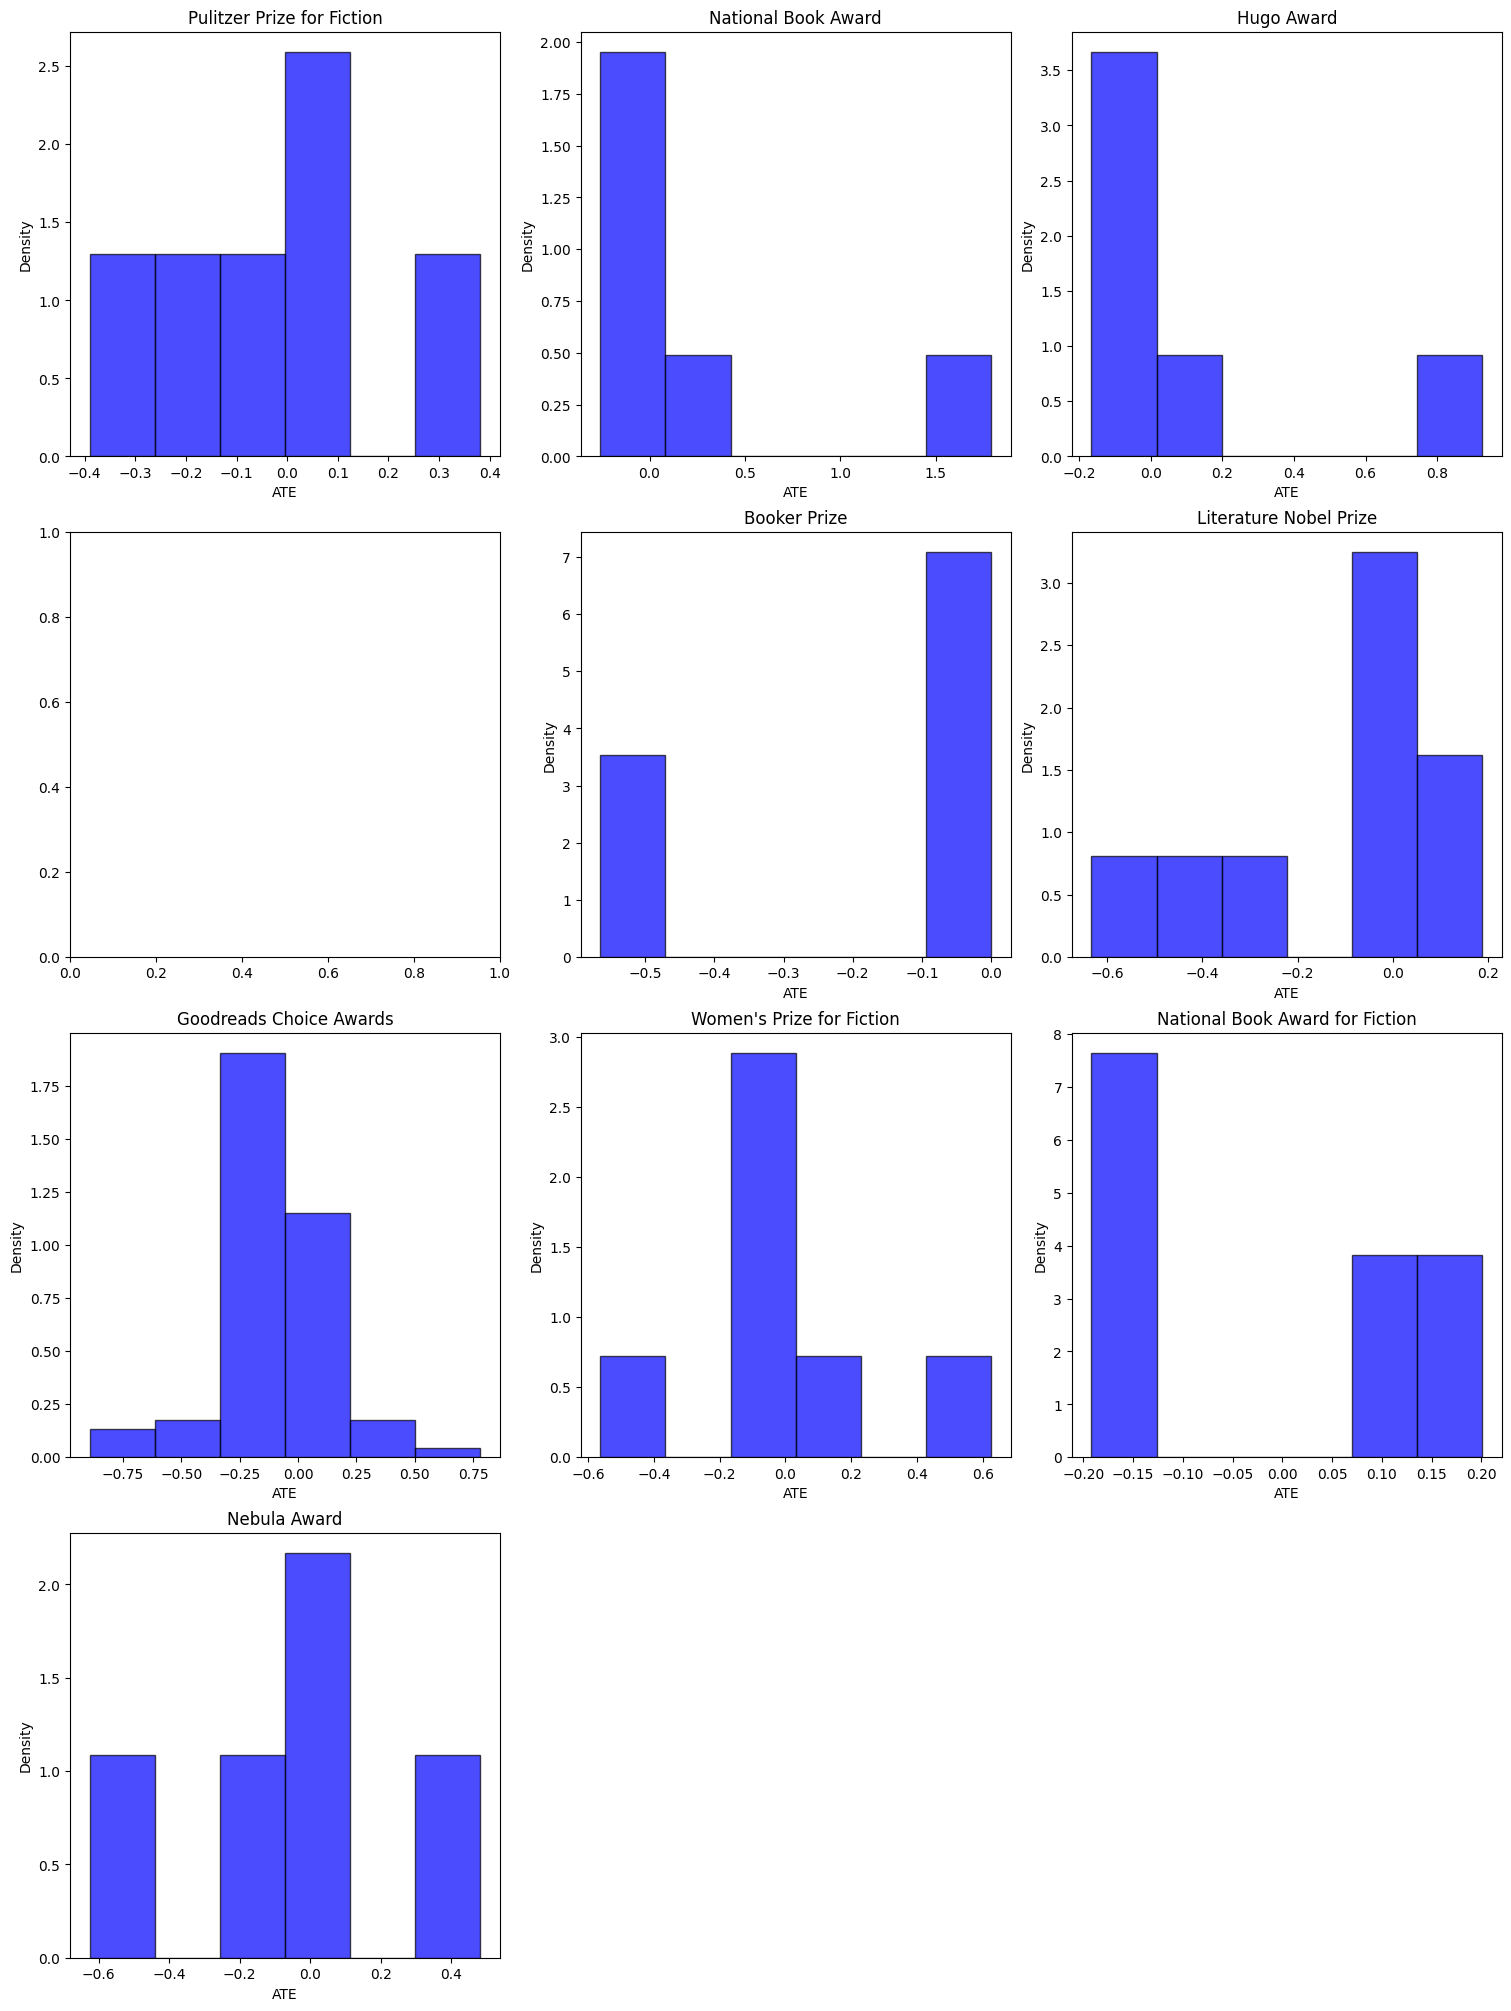

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Number of prizes
num_prizes = len(ate_by_prize)

# Create a grid of subplots
rows = int(np.ceil(num_prizes / 3))  # Arrange in rows of 3 columns
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each prize
for i, (prize, ate_values) in enumerate(ate_by_prize.items()):
    if len(ate_values) == 0:
        print(f"No valid ATE values for prize: {prize}")
        continue
    
    # Select the current axis
    ax = axes[i]
    
    # Plot histogram with logarithmic x-axis
    ax.hist(ate_values, bins=6, color='blue', alpha=0.7, edgecolor='black', density=True)
    
    # Add labels and title
    ax.set_xlabel('ATE', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.set_title(f'{prize}', fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Show the plot
plt.show()

Prize: Pulitzer Prize for Fiction
  Number of ATE values: 6
  Min: -0.3904, Max: 0.3814
  Mean: -0.0199, Std: 0.2439


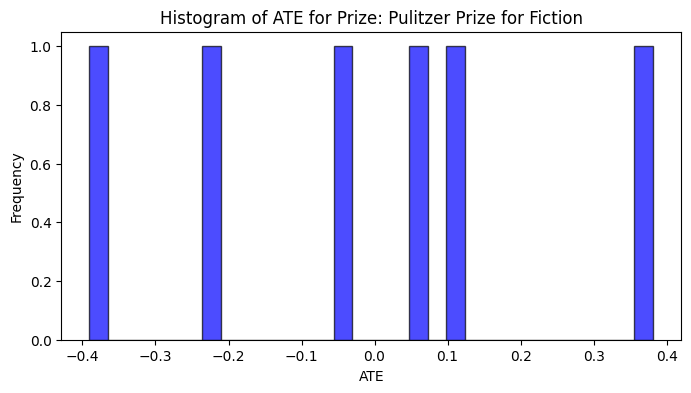

Prize: National Book Award
  Number of ATE values: 6
  Min: -0.2580, Max: 1.7910
  Mean: 0.1526, Std: 0.7433


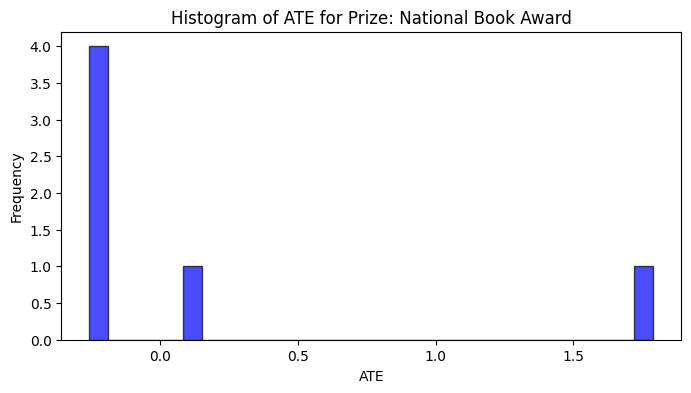

Prize: Hugo Award
  Number of ATE values: 6
  Min: -0.1657, Max: 0.9254
  Mean: 0.1194, Std: 0.3726


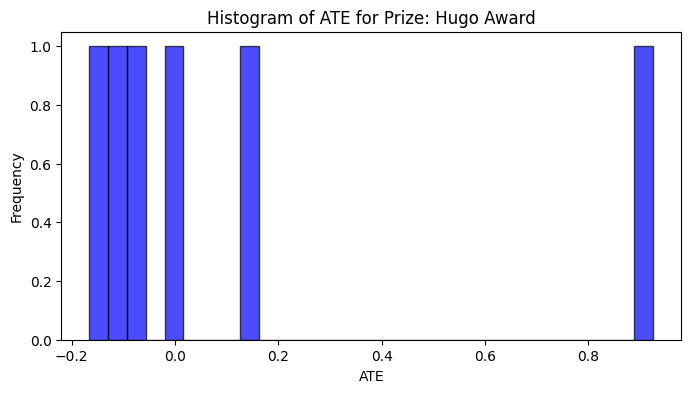

No ATE values for prize: Deutscher Buchpreis
Prize: Booker Prize
  Number of ATE values: 3
  Min: -0.5648, Max: -0.0000
  Mean: -0.2079, Std: 0.2535


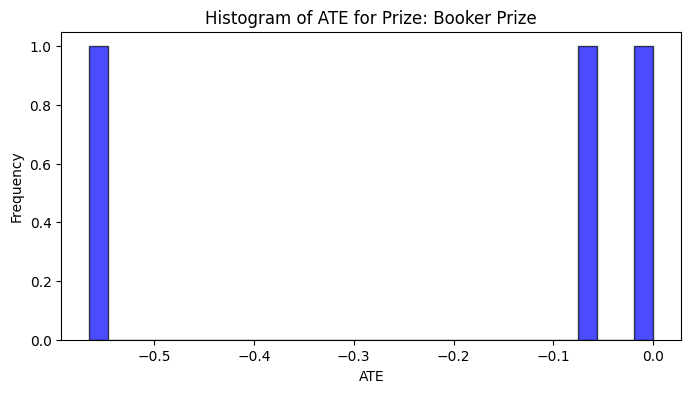

Prize: Literature Nobel Prize
  Number of ATE values: 9
  Min: -0.6335, Max: 0.1879
  Mean: -0.1368, Std: 0.2579


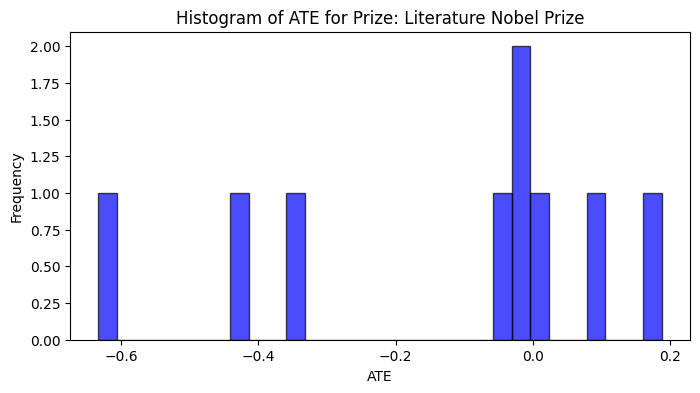

Prize: Goodreads Choice Awards
  Number of ATE values: 81
  Min: -0.8921, Max: 0.7801
  Mean: -0.0909, Std: 0.2335


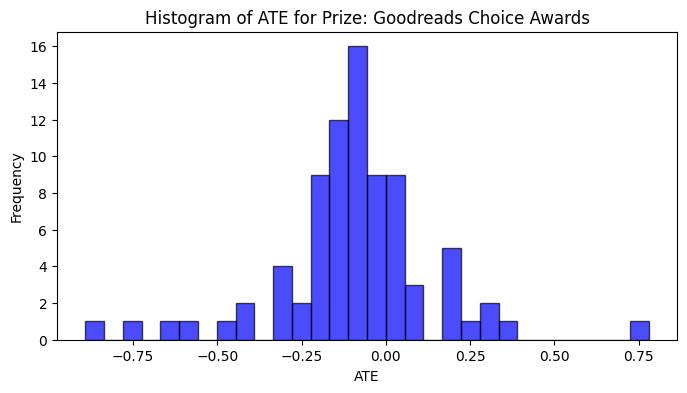

Prize: Women's Prize for Fiction
  Number of ATE values: 7
  Min: -0.5628, Max: 0.6252
  Mean: -0.0271, Std: 0.3251


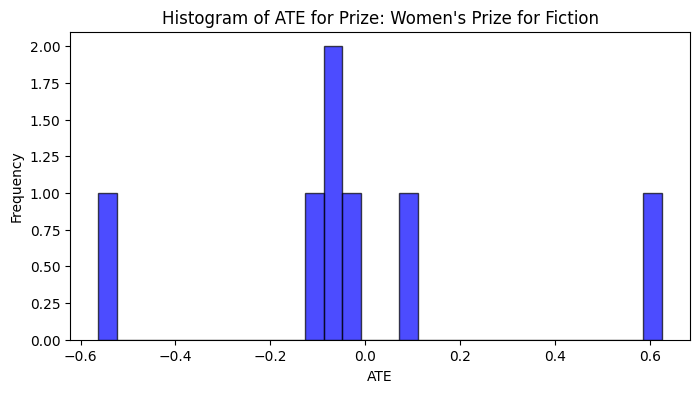

Prize: National Book Award for Fiction
  Number of ATE values: 4
  Min: -0.1918, Max: 0.2006
  Mean: -0.0192, Std: 0.1663


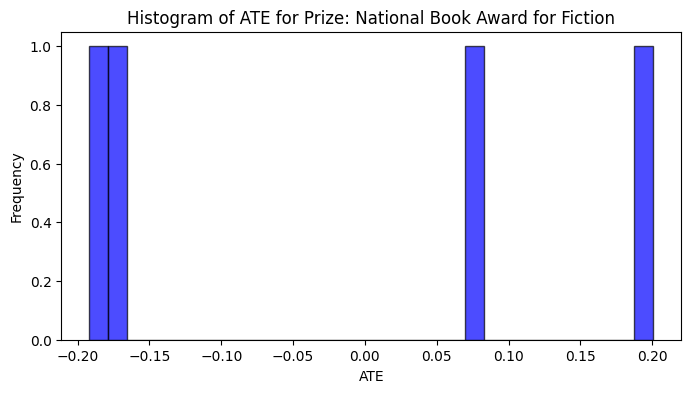

Prize: Nebula Award
  Number of ATE values: 5
  Min: -0.6255, Max: 0.4816
  Mean: -0.0706, Std: 0.3602


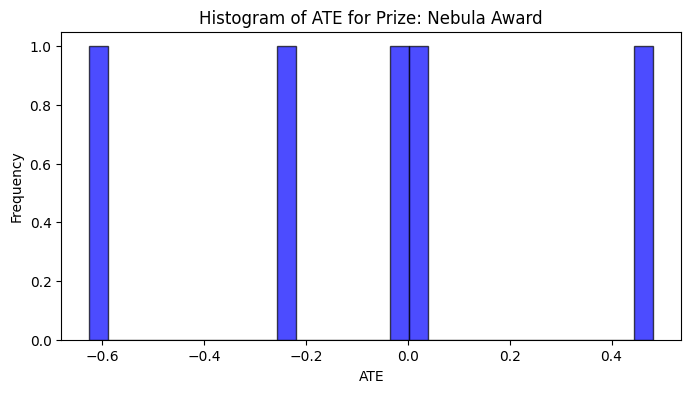

In [10]:
import matplotlib.pyplot as plt

# Inspect ATE distributions for each prize
for prize, ate_values in ate_by_prize.items():
    if len(ate_values) == 0:
        print(f"No ATE values for prize: {prize}")
        continue
    
    # Print summary statistics
    print(f"Prize: {prize}")
    print(f"  Number of ATE values: {len(ate_values)}")
    print(f"  Min: {np.min(ate_values):.4f}, Max: {np.max(ate_values):.4f}")
    print(f"  Mean: {np.mean(ate_values):.4f}, Std: {np.std(ate_values):.4f}")
    
    # Plot histogram for visual inspection
    plt.figure(figsize=(8, 4))
    plt.hist(ate_values, bins=30, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of ATE for Prize: {prize}')
    plt.xlabel('ATE')
    plt.ylabel('Frequency')
    plt.show()

In [11]:
import numpy as np

# Preprocess ATE values with log transformation
preprocessed_ate_by_prize = {}
min_samples = 5  # Minimum number of ATE values required

for prize, ate_values in ate_by_prize.items():
    if len(ate_values) < min_samples:
        print(f"Skipping prize: {prize} (insufficient data)")
        continue
    
    # Shift values to ensure positivity (add a small constant if needed)
    ate_values = np.array(ate_values)
    ate_values_shifted = ate_values + np.abs(np.min(ate_values)) + 1e-6  # Avoid log(0)
    
    # Apply log transformation
    log_ate_values = np.log(ate_values_shifted)
    
    # Store preprocessed values
    preprocessed_ate_by_prize[prize] = log_ate_values

Skipping prize: Deutscher Buchpreis (insufficient data)
Skipping prize: Booker Prize (insufficient data)
Skipping prize: National Book Award for Fiction (insufficient data)


No ATE values for prize: Deutscher Buchpreis


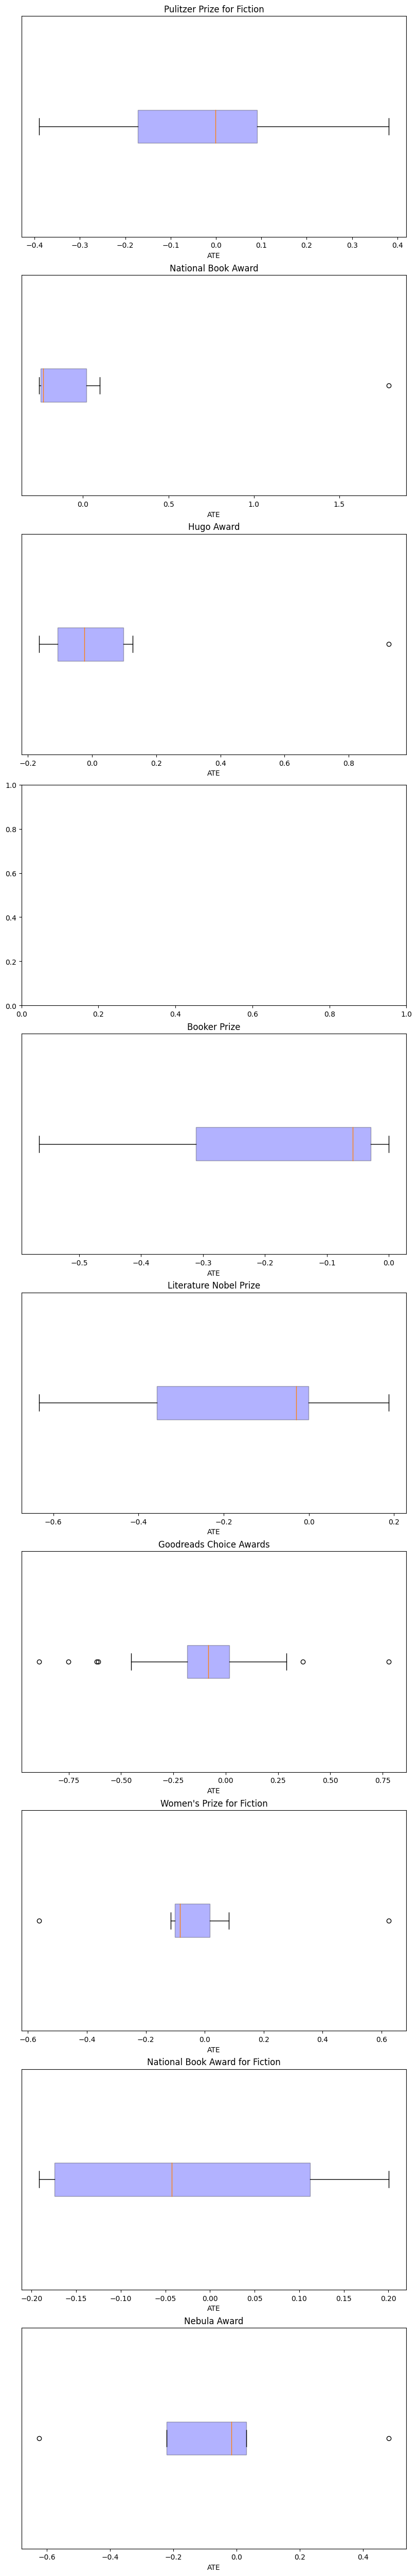

In [ ]:
import matplotlib.pyplot as plt

# Number of prizes
num_prizes = len(ate_by_prize)

# Create a single-column grid of subplots
fig, axes = plt.subplots(num_prizes, 1, figsize=(8, 5 * num_prizes), constrained_layout=True)

# If there's only one prize, ensure axes is iterable
if num_prizes == 1:
    axes = [axes]

# Plot boxplots for each prize
for i, (prize, ate_values) in enumerate(ate_by_prize.items()):
    if len(ate_values) == 0:
        print(f"No ATE values for prize: {prize}")
        continue
    
    # Select the current axis
    ax = axes[i]
    
    # Create boxplot
    ax.boxplot(ate_values, vert=False, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
    
    # Add labels and title
    ax.set_xlabel('ATE', fontsize=10)
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_title(f'{prize}', fontsize=12)

# Show the plot
plt.savefig('outcomes/boxplots_ate_by_prize.png', bbox_inches='tight', dpi=300)
plt.show()

In [13]:
display(ate_by_prize)

{'Pulitzer Prize for Fiction': [0.10486183059974552,
  0.38143813032134144,
  -0.39041297670015584,
  0.04972045820875026,
  -0.21278057405366457,
  -0.052255248310712155],
 'National Book Award': [0.09799542585593901,
  -0.2579749216303049,
  -0.25002509566265374,
  -0.21944271769974621,
  -0.2460639326937013,
  1.7909544563192137],
 'Hugo Award': [-0.12219361290077213,
  -0.0620963176810454,
  0.015257980313263086,
  -0.16565881438639085,
  0.12589753823673488,
  0.925439363668568],
 'Deutscher Buchpreis': [],
 'Booker Prize': [-0.564770706264424,
  -7.5223584539152455e-06,
  -0.05878625392266423],
 'Literature Nobel Prize': [-0.02957036743364938,
  -0.016469574665135767,
  -0.6334933433705956,
  -0.357163426771574,
  -0.03346437236806166,
  0.09037318864731692,
  0.18794569671564654,
  -0.43853104596667647,
  -0.001225705648338682],
 'Goodreads Choice Awards': [-0.13051068857380166,
  -0.0303197633695258,
  0.04900310067553004,
  -0.18917425671595423,
  0.07543000310952896,
  0.2899

In [14]:
import json
import numpy as np

def load_data(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

def compute_statistics(data):
    results = []
    all_ates = []
    all_stddevs = []
    
    for award, books in data.items():
        award_ates = []
        award_stddevs = []
        
        for book, details in books.items():
            ate = details['ATE']
            ci_low = details['CI_low']
            ci_high = details['CI_high']
            
            stddev = (ci_high - ci_low) / (2 * 1.96)  # Estimate stddev from CI
            
            if ate < 0:
                bound = ate + 1.645 * (stddev / np.sqrt(1))  # Upper bound for negative means
            else:
                bound = ate - 1.645 * (stddev / np.sqrt(1))  # Lower bound for non-negative means
            
            #results.append((book, ate, stddev, bound))
            award_ates.append(ate)
            award_stddevs.append(stddev)
            
            all_ates.append(ate)
            all_stddevs.append(stddev)
        
        # Compute award-level statistics
        award_mean = np.mean(award_ates)
        award_pooled_stddev = np.sqrt(np.mean(np.square(award_stddevs)))
        
        if award_mean < 0:
            award_bound = award_mean + 1.645 * (award_pooled_stddev / np.sqrt(len(award_ates)))
        else:
            award_bound = award_mean - 1.645 * (award_pooled_stddev / np.sqrt(len(award_ates)))
        
        results.append((award, award_mean, award_pooled_stddev, award_bound))
    
    # Compute overall statistics
    overall_mean = np.mean(all_ates)
    overall_pooled_stddev = np.sqrt(np.mean(np.square(all_stddevs)))
    
    if overall_mean < 0:
        overall_bound = overall_mean + 1.645 * (overall_pooled_stddev / np.sqrt(len(all_ates)))
    else:
        overall_bound = overall_mean - 1.645 * (overall_pooled_stddev / np.sqrt(len(all_ates)))
    
    results.append(('Overall', overall_mean, overall_pooled_stddev, overall_bound))
    
    return results

def print_statistics(results):
    for key, mean, stddev, upper_bound in results:
        print(f"{key}: Mean = {mean:.3f}, StdDev = {stddev:.3f}, 95% Upper/Lower Bound = {upper_bound:.3f}")


# Compute and print statistics
results = compute_statistics(all_results)
print_statistics(results)


Pulitzer Prize for Fiction: Mean = -0.020, StdDev = 0.051, 95% Upper/Lower Bound = 0.015
National Book Award: Mean = 0.153, StdDev = 0.108, 95% Upper/Lower Bound = 0.080
Hugo Award: Mean = 0.119, StdDev = 0.035, 95% Upper/Lower Bound = 0.096
Deutscher Buchpreis: Mean = nan, StdDev = nan, 95% Upper/Lower Bound = nan
Booker Prize: Mean = -0.208, StdDev = 0.058, 95% Upper/Lower Bound = -0.153
Literature Nobel Prize: Mean = -0.137, StdDev = 0.029, 95% Upper/Lower Bound = -0.121
Goodreads Choice Awards: Mean = -0.091, StdDev = 0.078, 95% Upper/Lower Bound = -0.077
Women's Prize for Fiction: Mean = -0.027, StdDev = 0.071, 95% Upper/Lower Bound = 0.017
National Book Award for Fiction: Mean = -0.019, StdDev = 0.151, 95% Upper/Lower Bound = 0.105
Nebula Award: Mean = -0.071, StdDev = 0.057, 95% Upper/Lower Bound = -0.028
Overall: Mean = -0.066, StdDev = 0.077, 95% Upper/Lower Bound = -0.054


/home/matthias/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/matthias/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [17]:
import numpy as np
from scipy import stats

def compute_statistics(data):
    results = []
    all_values = []
    
    for key, values in data.items():
        values = np.array(values)
        mean = np.mean(values)
        stddev = np.std(values, ddof=1)
        ci = stats.t.interval(0.95, len(values)-1, loc=mean, scale=stddev/np.sqrt(len(values)))
        results.append((key, mean, stddev, ci))
        all_values.extend(values)
    
    # Compute overall statistics
    all_values = np.array(all_values)
    overall_mean = np.mean(all_values)
    overall_stddev = np.std(all_values, ddof=1)
    overall_ci = stats.norm.interval(0.95, loc=overall_mean, scale=overall_stddev/np.sqrt(len(all_values)))
    results.append(('Overall', overall_mean, overall_stddev, overall_ci))
    
    return results

def print_statistics(results):
    for key, mean, stddev, ci in results:
        print(f"{key}: Mean = {mean:.3f}, StdDev = {stddev:.3f}, 95% CI = ({ci[0]:.3f}, {ci[1]:.3f})")

results = compute_statistics(ate_by_prize)
print_statistics(results)


Pulitzer Prize for Fiction: Mean = -0.020, StdDev = 0.267, 95% CI = (-0.300, 0.261)
National Book Award: Mean = 0.153, StdDev = 0.814, 95% CI = (-0.702, 1.007)
Hugo Award: Mean = 0.119, StdDev = 0.408, 95% CI = (-0.309, 0.548)
Deutscher Buchpreis: Mean = nan, StdDev = nan, 95% CI = (nan, nan)
Booker Prize: Mean = -0.208, StdDev = 0.310, 95% CI = (-0.979, 0.563)
Literature Nobel Prize: Mean = -0.137, StdDev = 0.273, 95% CI = (-0.347, 0.073)
Goodreads Choice Awards: Mean = -0.091, StdDev = 0.235, 95% CI = (-0.143, -0.039)
Women's Prize for Fiction: Mean = -0.027, StdDev = 0.351, 95% CI = (-0.352, 0.298)
National Book Award for Fiction: Mean = -0.019, StdDev = 0.192, 95% CI = (-0.325, 0.286)
Nebula Award: Mean = -0.071, StdDev = 0.403, 95% CI = (-0.571, 0.429)
Overall: Mean = -0.066, StdDev = 0.307, 95% CI = (-0.119, -0.012)
